In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gtda.homology import VietorisRipsPersistence

In [2]:
def sinoidal_trajectory(N, s):
    t = np.random.uniform(0, 2*np.pi, N)
    x = np.sin(t)
    y = np.sin(t - s)
    return np.array([x, y]).T

In [3]:
N = 2**10
s = 1/4 * np.pi

X = sinoidal_trajectory(N, s)

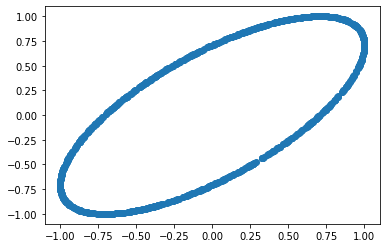

In [4]:
plt.scatter(X[:,0], X[:,1]);

In [5]:
dgms = VietorisRipsPersistence().fit_transform([X])[0]
dgm1 = np.array([dgm[:2] for dgm in dgms if dgm[2] == 1])

dgm1[:,1]

In [41]:
N = int(2**9 * 1.5)

shift2deaths = {}
for a in np.linspace(0, 0.5, 11):
    print(a)
    s = a * np.pi

    X = sinoidal_trajectory(N, s)
    dgms = VietorisRipsPersistence().fit_transform([X])[0]
    dgm1 = np.array([dgm[:2] for dgm in dgms if dgm[2] == 1])

    shift2deaths[a] = sorted(dgm1[:,1])

0.0
0.05
0.1
0.15000000000000002
0.2
0.25
0.30000000000000004
0.35000000000000003
0.4
0.45
0.5


In [56]:
for k, vs in shift2deaths.items():
    minor = np.mean(vs)
    print(f"{k:.2f} : {minor:.5f}")

0.00 : 0.00000
0.05 : 0.21646
0.10 : 0.44239
0.15 : 0.65977
0.20 : 0.87408
0.25 : 1.08241
0.30 : 1.28409
0.35 : 1.47533
0.40 : 1.61991
0.45 : 1.70474
0.50 : 1.73212


In [61]:
for a in np.linspace(0, 0.5, 11):
    s = a * np.pi
    minor = np.sin(a) * np.sqrt(3) / 0.479425538604203
    print(f"{a:.2f}: {minor:.5f}")

0.00: 0.00000
0.05: 0.18056
0.10: 0.36067
0.15: 0.53988
0.20: 0.71775
0.25: 0.89381
0.30: 1.06764
0.35: 1.23881
0.40: 1.40688
0.45: 1.57143
0.50: 1.73205


In [58]:
for a in np.linspace(0, 0.5, 11):
    s = a * np.pi
    minor = 2 * a * np.sqrt(3)
    print(f"{a:.2f}: {minor:.5f}")

0.00: 0.00000
0.05: 0.17321
0.10: 0.34641
0.15: 0.51962
0.20: 0.69282
0.25: 0.86603
0.30: 1.03923
0.35: 1.21244
0.40: 1.38564
0.45: 1.55885
0.50: 1.73205


In [60]:
for a in np.linspace(0, 0.5, 11):
    s = a * np.pi
    minor = np.sqrt(2) * np.sin(s/2) * np.sqrt(3)
    print(f"{a:.2f}: {minor}")

0.00: 0.0
0.05: 0.19218475021339965
0.10: 0.3831846175338192
0.15: 0.5718220242653271
0.20: 0.7569339580671206
0.25: 0.9373791423113474
0.30: 1.1120450724330289
0.35: 1.279854874890649
0.40: 1.4397739464496355
0.45: 1.5908163328553386
0.50: 1.7320508075688772


In [63]:
for a in np.linspace(0, 0.5, 11):
    s = a * np.pi
    minor = (1 - np.cos(s)) * np.sqrt(3)
    print(f"{a:.2f}: {minor}")

0.00: 0.0
0.05: 0.021324419614704587
0.10: 0.0847726004762135
0.15: 0.18878223779927644
0.20: 0.3307922691248037
0.25: 0.5073059361772881
0.30: 0.7139768866586229
0.35: 0.9457161958663971
0.40: 1.1968176729092423
0.45: 1.46109836606434
0.50: 1.732050807568877


In [69]:
s = 0.001
np.sqrt(1 - np.sin(s/2)**2 / np.cos(s/2)**2)

0.9999998749999713

In [67]:
np.tan(s/2)

0.0005000000416666708

In [68]:
np.tan(s)

0.0010000003333334668

In [72]:
for a in np.linspace(0, 0.5, 11):
    s = a * np.pi
    minor = np.sqrt(3) * (1 - np.sqrt(1 - np.sin(s/2)**2 / np.cos(s/2)**2))
    print(f"{a:.2f}: {minor}")

0.00: 0.0
0.05: 0.0053724576644499904
0.10: 0.021862774869183067
0.15: 0.050656574107951366
0.20: 0.0939782899434372
0.25: 0.15557328656245006
0.30: 0.2416980141160985
0.35: 0.363319430648908
0.40: 0.5419214595571841
0.45: 0.8311409629369267
0.50: 1.7320507710686357


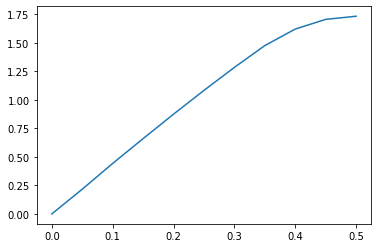

In [46]:
plt.plot(shift2deaths.keys(), list(map(np.mean, shift2deaths.values())))